In [15]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import time

# Define Functions

In [16]:
def for_loop(n: int) -> list:
    a = []
    for i in range(n):
        a.append(i)
    return a

def list_comprehension(n: int) -> list:
    return [i for i in range(n)]

# Run Functions n times to gather performance data

In [17]:
for_loop_times = []

for _ in range(100):

    start = time.perf_counter()

    for_loop(100_000)

    end = time.perf_counter()

    for_loop_times.append(end-start)


In [18]:
list_comprehension_times = []

for _ in range(100):

    start = time.perf_counter()

    list_comprehension(100_000)

    end = time.perf_counter()

    list_comprehension_times.append(end-start)

# Define t-Test and run it

In [19]:
def t_test(sample1: np.array, sample2: np.array) -> float:

    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)

    n1 = len(sample1)
    n2 = len(sample2)

    std1 = np.std(sample1)
    std2 = np.std(sample2)

    std12 = np.sqrt( ((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2)  )

    t = (mean1 - mean2) / (std12 * np.sqrt(1/n1 + 1/n2))

    return t

In [20]:
t_value = t_test(for_loop_times, list_comprehension_times)
print(f"t = {t_value:.3f}")

print(f"(Check: Scipy says: t = {stats.ttest_ind(for_loop_times, list_comprehension_times).statistic:.3f})")

t = 14.483
(Check: Scipy says: t = 14.411)


# Generate t-distribution from H0 and check alpha value

alpha value: 1.960
Discard H0: True


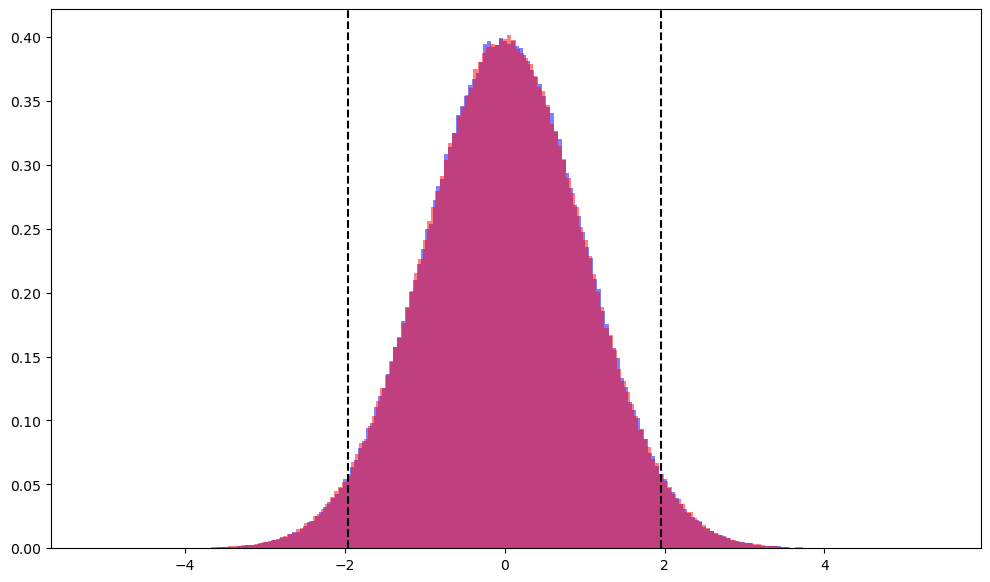

In [22]:
plt.figure(figsize=(12,7))

random_mu = (np.random.random()-0.5)*20  # random float between -10 and 10 
random_std = (np.random.random())*10  # random float between 0 and 10 

a, b = np.random.normal(loc=random_mu, scale=random_std, size=(2, 1_000_000)) / (np.sqrt(2) * random_std)

plt.hist(a-b, bins=200, alpha=0.5, color="blue", density=True)

plt.hist(np.random.standard_t(df=198, size=1_000_000), bins=200, alpha=0.5, color="red", density=True)

alpha_t = np.abs(np.percentile(a-b, 2.5))
plt.axvline(-alpha_t, linestyle="dashed", color="black")
plt.axvline(alpha_t, linestyle="dashed", color="black")

print(f"alpha value: {alpha_t:.3f}")
print(f"Discard H0: {np.abs(t_value) > np.abs(alpha_t)}")